In [1]:
! pip install transformers
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00


In [3]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=6d8c025879e8421fbc392274e588041b6b5056f6d10e12d6c1012e149cc6f82a
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=f981ab68e4fb84d5f61b40e8909f70b2e42967b313d1f72ea7ea2dc2ca301748
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 7.1 MB/s eta 0:00:00


In [1]:
from datasets import list_datasets , Dataset
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
import transformers
from transformers import AutoTokenizer , pipeline
from transformers import AutoModel
import tensorflow as tf
from transformers import TFAutoModel
import numpy as np
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score

## **Importing Data and Visualising**

In [2]:
available_datasets = list_datasets()
print(f'''There are total {len(available_datasets)} currently Hub holds
Top 10 of the datasets are: ''')
i = 1
for data in available_datasets[ : 10] :
  print(f"{i}. {data}")
  i +=1


<ipython-input-2-a3aecc518f25>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  available_datasets = list_datasets()


There are total 73789 currently Hub holds
Top 10 of the datasets are: 
1. acronym_identification
2. ade_corpus_v2
3. adversarial_qa
4. aeslc
5. afrikaans_ner_corpus
6. ag_news
7. ai2_arc
8. air_dialogue
9. ajgt_twitter_ar
10. allegro_reviews


In [3]:
emotions = load_dataset("emotion")
emotions

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
emotions.set_format(type = "pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


#### **Exploring Different Methods**

In [5]:
def label_int2str(row) :
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [6]:
df["label_name"].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

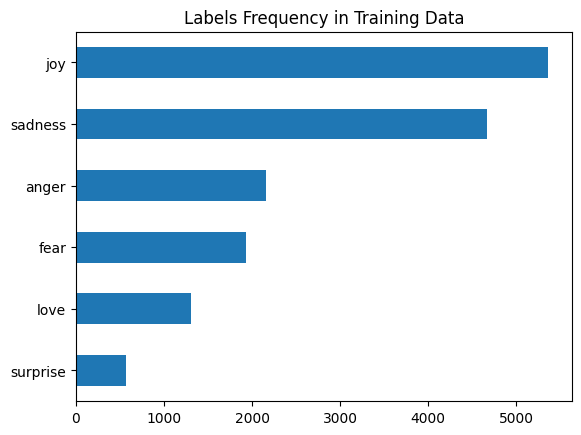

In [7]:
df["label_name"].value_counts(ascending=True).plot(kind = "barh")
plt.title("Labels Frequency in Training Data");

#### **Getting Number of Tokens Per emotions**

In [8]:
df["Word Per Text"] = df["text"].str.split().apply(len)
df.head(10)

,text,label,label_name,Word Per Text
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
5,ive been feeling a little burdened lately wasn...,0,sadness,12
6,ive been taking or milligrams or times recomme...,5,surprise,23
7,i feel as confused about life as a teenager or...,4,fear,17
8,i have been with petronas for years i feel tha...,1,joy,19
9,i feel romantic too,2,love,4


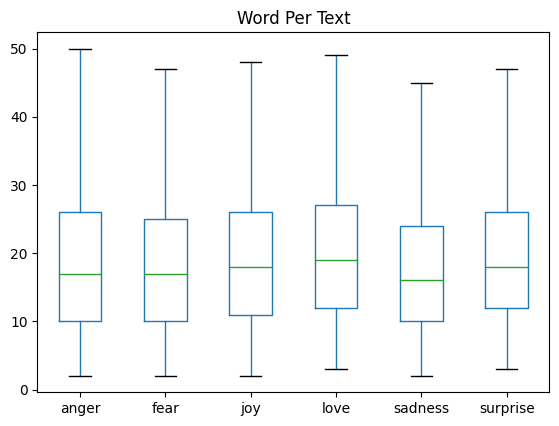

In [9]:
df.boxplot("Word Per Text" , by = "label_name" , showfliers = False , grid = False  )
plt.suptitle("")
plt.xlabel("");

**Note :**From the plot we see that for each emotion, most tweets are around 15 words long and the
longest tweets are well below DistilBERT’s maximum context size. Texts that are longer than a
model’s context size need to be truncated, which can lead to a loss in performance if the
truncated text contains crucial information.

In [10]:
emotions.reset_format()

### **Tokenization and Further Processing**

In [11]:
model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

In [12]:
text = "Hi , I am starting to learn NLP using transformers and till now finding all the things very intresting...!!!"

encoded = tokenizer(text)
print(encoded)

{'input_ids': [101, 7632, 1010, 1045, 2572, 3225, 2000, 4553, 17953, 2361, 2478, 19081, 1998, 6229, 2085, 4531, 2035, 1996, 2477, 2200, 20014, 28533, 2075, 1012, 1012, 1012, 999, 999, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [13]:
tokens = tokenizer.convert_ids_to_tokens(encoded.input_ids)
print(tokens)

['[CLS]', 'hi', ',', 'i', 'am', 'starting', 'to', 'learn', 'nl', '##p', 'using', 'transformers', 'and', 'till', 'now', 'finding', 'all', 'the', 'things', 'very', 'int', '##rest', '##ing', '.', '.', '.', '!', '!', '!', '[SEP]']


In [14]:
sentence = tokenizer.convert_tokens_to_string(tokens)
print(sentence)

[CLS] hi, i am starting to learn nlp using transformers and till now finding all the things very intresting...!!! [SEP]


**Note** : Explaination of all the special token is mentioned in repos Readme file .

**Other Methods of AutoTokenizer**

In [15]:
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)
print(tokenizer.model_input_names)

30522
512
['input_ids', 'attention_mask']


**To understand all the Special Token**

In [16]:
tokens2ids = list(zip(tokenizer.all_special_tokens , tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [17]:
def tokenize(batch) :
  return(tokenizer(batch["text"] , padding = True , truncation = True))

In [18]:
encoded_emotions = emotions.map(tokenize , batched = True , batch_size = None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [19]:
encoded_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### **Feature Extraction**

In [20]:
if torch.cuda.is_available :
  device = "cuda"
else :
  device = "cpu"

print(device)

cuda


##**Extracting the last hidden state**

#### **IN PYTORCH**

In [21]:
model_ckpt = "distilbert-base-uncased"
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [22]:
text = "let's run the test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 8])


In [23]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2292, 1005, 1055, 2448, 1996, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1, 1, 1]]))])

In [24]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [25]:
inputs

{'input_ids': tensor([[ 101, 2292, 1005, 1055, 2448, 1996, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [26]:
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[ 0.1001, -0.1345,  0.1135,  ..., -0.0305,  0.3209,  0.3390],
         [ 1.0121, -0.0194,  0.0282,  ...,  0.0365,  0.8524,  0.1135],
         [ 1.1782,  0.1962, -0.0351,  ..., -0.2625, -0.4499, -0.3909],
         ...,
         [ 0.1183, -0.6392, -0.1043,  ..., -0.0860,  0.4064, -0.0015],
         [ 0.5178, -0.3345, -0.3712,  ..., -0.1235,  0.0198, -0.6611],
         [ 1.2052,  0.3638, -0.3268,  ...,  0.1029, -0.3744, -0.3088]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [27]:
outputs.last_hidden_state.size()

torch.Size([1, 8, 768])

**IMPORTANT : Here we got last hidden state and that is all we needed as an output for the model as model provide only this much informationa and now we will save that info to out table or dataset (this is use of feature exraction)**

#### **Applying last hidden state to entire dataset**

In [28]:
def extract_hidden_state(batch) :
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [29]:
encoded_emotions.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [30]:
hidden_emotions = encoded_emotions.map(extract_hidden_state, batched=True)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
hidden_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [32]:
train_dataframe = hidden_emotions["train"].to_pandas()
train_dataframe.head()

,text,label,input_ids,attention_mask,hidden_state
0,i didnt feel humiliated,0,"[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.1167511, 0.09857134, -0.1296291, -0.095017..."
1,i can go from feeling so hopeless to so damned...,0,"[101, 1045, 2064, 2175, 2013, 3110, 2061, 2062...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-0.03236294, -0.03231493, -0.19572602, -0.346..."
2,im grabbing a minute to post i feel greedy wrong,3,"[101, 10047, 9775, 1037, 3371, 2000, 2695, 104...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[0.039746378, 0.20223343, 0.14227127, -0.15119..."
3,i am ever feeling nostalgic about the fireplac...,2,"[101, 1045, 2572, 2412, 3110, 16839, 9080, 128...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-0.032459278, 0.12369049, 0.10023793, -0.3022..."
4,i am feeling grouchy,3,"[101, 1045, 2572, 3110, 24665, 7140, 11714, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.013516577, 0.19073102, 0.05873869, -0.2707..."


In [33]:
encoded_emotions.reset_format()

### **IN TENSORFLOW**

In [34]:
model_ckpt_tf = "distilbert-base-uncased"
model_tf = TFAutoModel.from_pretrained(model_ckpt_tf)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [35]:
text = "let's run the test"
inputs_tf = tokenizer(text, return_tensors="tf")
print(f"{inputs_tf}")

{'input_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[ 101, 2292, 1005, 1055, 2448, 1996, 3231,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [36]:
outputs_tf = model_tf(**inputs_tf)
outputs_tf

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 8, 768), dtype=float32, numpy=
array([[[ 0.10005747, -0.13452786,  0.1135098 , ..., -0.03053226,
          0.32086322,  0.3390266 ],
        [ 1.012109  , -0.01935871,  0.02823805, ...,  0.03654924,
          0.8524154 ,  0.11349984],
        [ 1.1782157 ,  0.19620095, -0.03507789, ..., -0.26247197,
         -0.4499261 , -0.39092517],
        ...,
        [ 0.11831146, -0.639163  , -0.10431719, ..., -0.08600879,
          0.4063908 , -0.00148112],
        [ 0.5178344 , -0.3345372 , -0.37116486, ..., -0.12345441,
          0.01984772, -0.661094  ],
        [ 1.2051818 ,  0.3637552 , -0.32677597, ...,  0.10287113,
         -0.3744395 , -0.3088008 ]]], dtype=float32)>, hidden_states=None, attentions=None)

In [37]:
outputs_tf.last_hidden_state.shape

TensorShape([1, 8, 768])

In [38]:
def extract_hidden_state_tf(batch) :
  inputs_tf = {k:v for k,v in batch.items() if k in tokenizer.model_input_names}
  last_hidden_state_tf = model_tf(**inputs_tf).last_hidden_state
  return {"hidden_state": last_hidden_state_tf[:,0].cpu().numpy()}

In [39]:
encoded_emotions.set_format("tensorflow", columns=["input_ids", "attention_mask", "label"])

In [40]:
hidden_emotions_tf = encoded_emotions.map(extract_hidden_state_tf, batched=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [41]:
hidden_emotions_tf

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [42]:
train_dataframe = hidden_emotions_tf["train"].to_pandas()
train_dataframe.head()

,text,label,input_ids,attention_mask,hidden_state
0,i didnt feel humiliated,0,"[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.11675128, 0.098571256, -0.12962957, -0.095..."
1,i can go from feeling so hopeless to so damned...,0,"[101, 1045, 2064, 2175, 2013, 3110, 2061, 2062...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-0.03236264, -0.032314993, -0.19572638, -0.34..."
2,im grabbing a minute to post i feel greedy wrong,3,"[101, 10047, 9775, 1037, 3371, 2000, 2695, 104...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[0.039746426, 0.20223357, 0.14227128, -0.15119..."
3,i am ever feeling nostalgic about the fireplac...,2,"[101, 1045, 2572, 2412, 3110, 16839, 9080, 128...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-0.03245908, 0.123690814, 0.10023778, -0.3022..."
4,i am feeling grouchy,3,"[101, 1045, 2572, 3110, 24665, 7140, 11714, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.013516772, 0.19073121, 0.0587387, -0.27078..."


In [43]:
encoded_emotions.reset_format()

### **Visuaizing the Pytorch Hidden State**

### **For Classifier we have :**
* Hidden State as Input
* Labels as Target

In [44]:
X_train = np.array(hidden_emotions["train"]["hidden_state"])
X_valid = np.array(hidden_emotions["validation"]["hidden_state"])
y_train = np.array(hidden_emotions["train"]["label"])
y_valid = np.array(hidden_emotions["validation"]["label"])
X_train.shape, X_valid.shape , y_train.shape , y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

In [45]:
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.076347,6.871988,0
1,-3.380054,6.217140,0
2,5.149921,3.306721,3
3,-2.459231,4.249521,2
4,-3.573072,4.300458,3


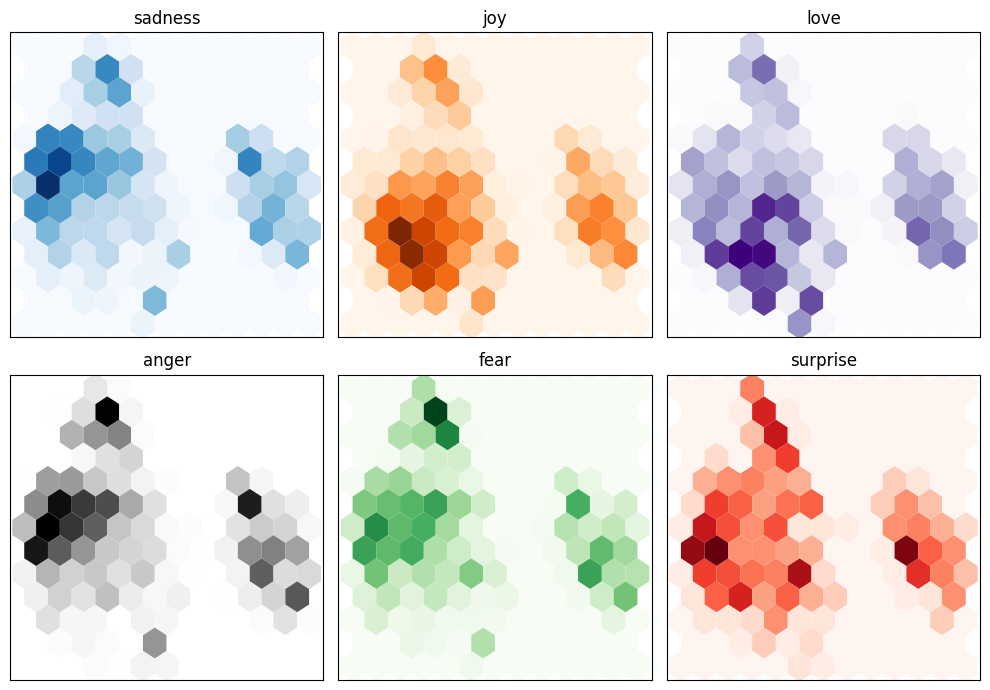

In [46]:
fig, axes = plt.subplots(2 , 3 , figsize = (10 , 7))
axes = axes.flatten()
cmaps = ["Blues", "Oranges", "Purples","Greys", "Greens", "Reds"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap , gridsize=12, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

### **Visuaizing the TensorFlow Hidden State**

In [47]:
X_train_tf = np.array(hidden_emotions_tf["train"]["hidden_state"])
X_valid_tf = np.array(hidden_emotions_tf["validation"]["hidden_state"])
y_train_tf = np.array(hidden_emotions_tf["train"]["label"])
y_valid_tf = np.array(hidden_emotions_tf["validation"]["label"])
X_train_tf.shape, X_valid_tf.shape , y_train_tf.shape , y_valid_tf.shape

((16000, 768), (2000, 768), (16000,), (2000,))

In [48]:
X_scaled_tf = MinMaxScaler().fit_transform(X_train_tf)
mapper_tf = UMAP(n_components=2, metric="cosine").fit(X_scaled_tf)
df_emb_tf = pd.DataFrame(mapper_tf.embedding_, columns=["X_tf", "Y_tf"])
df_emb_tf["label"] = y_train_tf
df_emb_tf.head()

,X_tf,Y_tf,label
0,3.768870,5.845754,0
1,-3.495150,5.081618,0
2,5.137840,2.565509,3
3,-2.553307,3.003234,2
4,-3.552348,3.168718,3


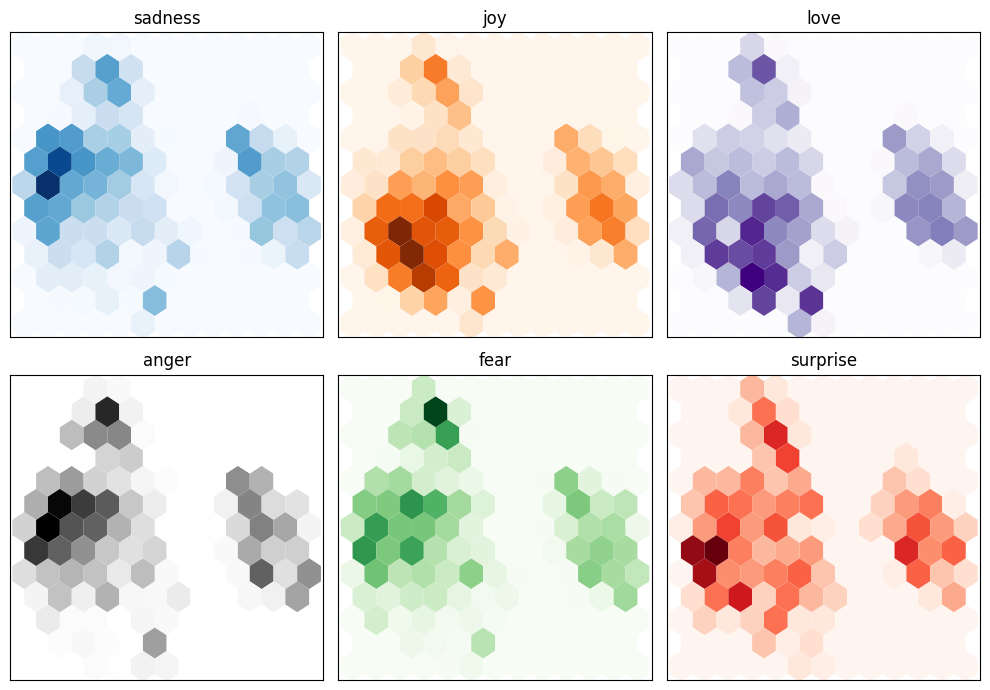

In [49]:
fig, axes = plt.subplots(2 , 3 , figsize = (10 , 7))
axes = axes.flatten()
cmaps = ["Blues", "Oranges", "Purples","Greys", "Greens", "Reds"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub_tf = df_emb_tf.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub_tf["X_tf"], df_emb_sub_tf["Y_tf"], cmap=cmap , gridsize=12, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

## **Training a Logistic Regression**

### **Using Pytorch Hidden State**

In [50]:
clf = LogisticRegression(max_iter=3000)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.6335

**Note : Scikit-learn there is a DummyClassifier that can be used to build a classifier with simple heuristics such as always choosing the majority class or always drawing a random class.**

#### **Comparing With Dummy Classifier**

In [51]:
dummy_clf = DummyClassifier(strategy="most_frequent") # We are selecting Most Frequent class
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

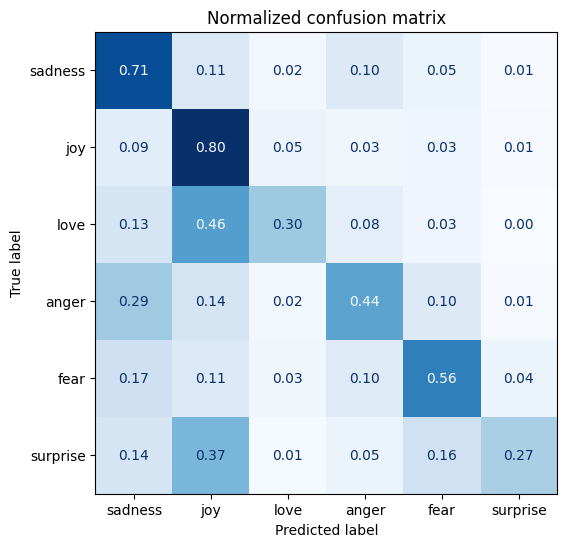

In [52]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

### **Using Tensorflow Hidden State**

In [53]:
clf_tf = LogisticRegression(max_iter=3000)
clf_tf.fit(X_train_tf, y_train_tf)
clf_tf.score(X_valid_tf, y_valid_tf)

0.6335

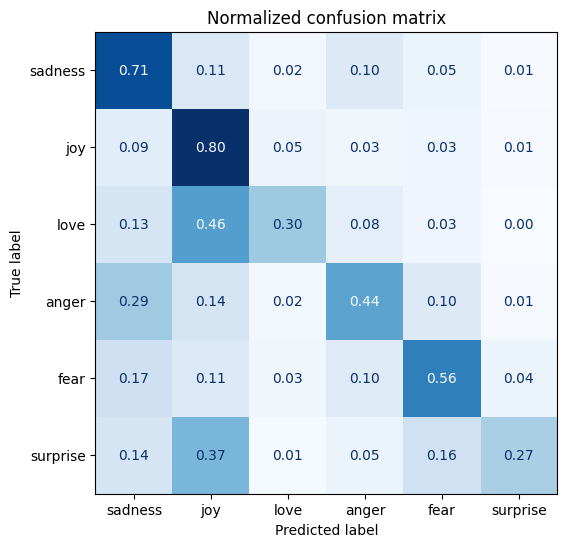

In [54]:
y_preds = clf.predict(X_valid_tf)
plot_confusion_matrix(y_preds, y_valid, labels)

## **Fine Tuning**
**Here Since we have to train the hidden state that's why we will need to use Neural Network**

### **In Pytorch**

**Important Note : The AutoModelForSequenceClassification is used here because it is made for classification specific and we only need to give number of classes**

In [55]:
model_ckpt = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt , num_labels = 6).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### **Metric Function**

In [56]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


In [57]:
batch_size = 64
logging_steps = len(encoded_emotions["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=True,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="info")

In [58]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=encoded_emotions["train"],
                  eval_dataset=encoded_emotions["validation"],
                  tokenizer=tokenizer)

In [59]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 16,000
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 500
  Number of trainable parameters = 66,958,086
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSe

{'loss': 0.8593, 'learning_rate': 1e-05, 'epoch': 1.0}
{'eval_loss': 0.334388792514801, 'eval_accuracy': 0.9055, 'eval_f1': 0.9047149588888852, 'eval_runtime': 4.0306, 'eval_samples_per_second': 496.2, 'eval_steps_per_second': 7.939, 'epoch': 1.0}


Saving model checkpoint to distilbert-base-uncased-finetuned-emotion/checkpoint-500
Configuration saved in distilbert-base-uncased-finetuned-emotion/checkpoint-500/config.json


{'loss': 0.257, 'learning_rate': 0.0, 'epoch': 2.0}


Model weights saved in distilbert-base-uncased-finetuned-emotion/checkpoint-500/pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-emotion/checkpoint-500/tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-emotion/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




{'eval_loss': 0.22471417486667633, 'eval_accuracy': 0.9225, 'eval_f1': 0.9226000502851177, 'eval_runtime': 4.3949, 'eval_samples_per_second': 455.077, 'eval_steps_per_second': 7.281, 'epoch': 2.0}
{'train_runtime': 235.2775, 'train_samples_per_second': 136.01, 'train_steps_per_second': 2.125, 'train_loss': 0.5581350708007813, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.5581350708007813, metrics={'train_runtime': 235.2775, 'train_samples_per_second': 136.01, 'train_steps_per_second': 2.125, 'train_loss': 0.5581350708007813, 'epoch': 2.0})

**We can Draw Confusion Metrix for Better Understanding but for that we need validation data prediction**

In [60]:
preds_output = trainer.predict(encoded_emotions["validation"])

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


In [61]:
preds_output.predictions.shape

(2000, 6)

In [62]:
preds_output.metrics

{'test_loss': 0.22471417486667633,
 'test_accuracy': 0.9225,
 'test_f1': 0.9226000502851177,
 'test_runtime': 4.0982,
 'test_samples_per_second': 488.024,
 'test_steps_per_second': 7.808}

In [63]:
preds = np.argmax(preds_output.predictions , axis = 1 )

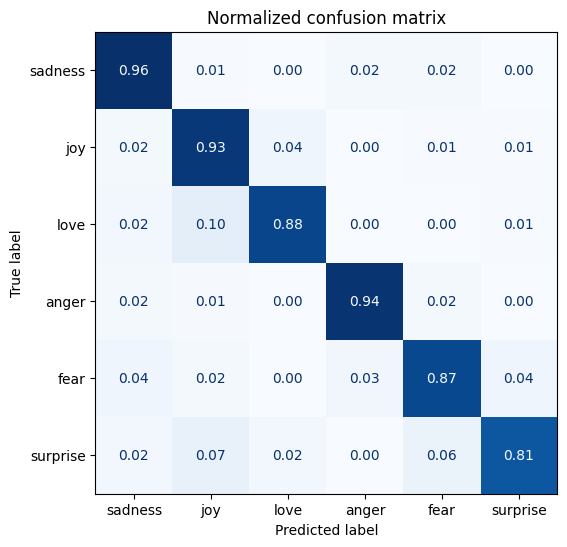

In [64]:
plot_confusion_matrix(preds, y_valid, labels)

#### **In TensorFlow**

In [65]:
model_tf = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=6))

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.34.1",
  "vocab_size": 30522
}



In [66]:
tokenizer_columns = tokenizer.model_input_names
train_dataset_tf = encoded_emotions["train"].to_tf_dataset(columns=tokenizer_columns, label_cols=["label"], shuffle=True , batch_size = 64)
eval_dataset_tf = encoded_emotions["validation"].to_tf_dataset(columns=tokenizer_columns, label_cols=["label"], shuffle=False , batch_size = 64)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:400: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [67]:
model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5) ,
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                 metrics=tf.metrics.SparseCategoricalAccuracy())


history = model_tf.fit(train_dataset_tf, validation_data=eval_dataset_tf, epochs=2)

Epoch 1/2
250/250 [==============================] - 162s 556ms/step - loss: 0.5284 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.1874 - val_sparse_categorical_accuracy: 0.9275
Epoch 2/2
250/250 [==============================] - 138s 553ms/step - loss: 0.1447 - sparse_categorical_accuracy: 0.9389 - val_loss: 0.1476 - val_sparse_categorical_accuracy: 0.9395


<Axes: >

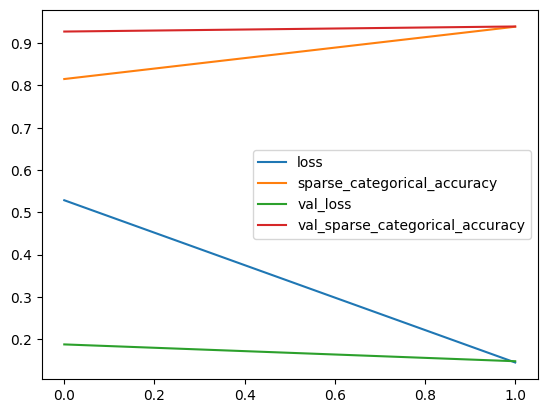

In [68]:
pd.DataFrame(history.history).plot()

In [69]:
pred_prob = model_tf.predict(eval_dataset_tf)
logits = pred_prob.logits

32/32 [==============================] - 6s 144ms/step


In [70]:
pred_tf = tf.argmax(logits , axis = -1)

In [71]:
pred_tf

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([0, 0, 1, ..., 1, 1, 1])>

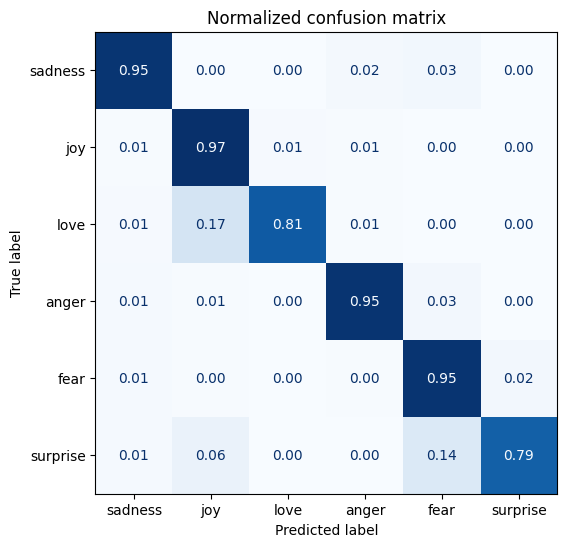

In [72]:
plot_confusion_matrix(pred_tf, y_valid, labels)

---

# **Predicting on Random Sentences**

In [73]:
classes = ["SAD" , "JOY" , "LOVE" , "ANGER" , "FEAR" , "SURPRISE"]

In [76]:
num_sen = int(input("How Many Sentences You want to Input ???\n\n"))
output_file = "/content/drive/MyDrive/Colab Notebooks/Projects/EMOTION_ANALYSIS/output/output.txt"  # Specify the name of the output file

with open(output_file, "a") as f:  # Use "a" for append mode
    for i in range(num_sen):
        sentence = input("Please Enter a Sentence...\n\n")
        input_tensor = tokenizer(sentence, return_tensors="pt").to(model.device)
        result = model(**input_tensor)
        predicted_label = result.logits.argmax(dim=-1)
        predicted_score = result.logits.softmax(dim=-1)
        emotion = classes[int(predicted_label)]
        probability = float(predicted_score.max(dim=-1).values)
        output = f"{sentence}\nYou Seem to be {emotion}\nPrediction accuracy according to me is :{(probability*100):.2f}\n\n"
        print(output)  # Print the result
        f.write(output)  # Append the result to the output file

print("***TASK COMPLETED HOPE YOU LIKED MY RESULTS***")

How Many Sentences You want to Input ???

5
Please Enter a Sentence...

Hey you listen carefully ...I am busy !!!
Hey you listen carefully ...I am busy !!!
You Seem to be JOY
Prediction accuracy according to me is :93.35


Please Enter a Sentence...

are you gone mad
are you gone mad
You Seem to be ANGER
Prediction accuracy according to me is :94.30


Please Enter a Sentence...

I am feeling low 
I am feeling low 
You Seem to be SAD
Prediction accuracy according to me is :97.51


Please Enter a Sentence...

you play well, never stop playing 
you play well, never stop playing 
You Seem to be JOY
Prediction accuracy according to me is :95.27


Please Enter a Sentence...

can i please borrow your toy 
can i please borrow your toy 
You Seem to be JOY
Prediction accuracy according to me is :83.58


***TASK COMPLETED HOPE YOU LIKED MY RESULTS***


In [80]:
import shutil

source_path = "/content/distilbert-base-uncased-finetuned-emotion"

destination_path = "/content/drive/MyDrive/Colab Notebooks/Projects/EMOTION_ANALYSIS/model_emotion_analysis"

shutil.copytree(source_path, destination_path)


'/content/drive/MyDrive/Colab Notebooks/Projects/EMOTION_ANALYSIS/model_emotion_analysis'